In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def one_limit(patient, ref, keylwst, keybgst, constant):
    x_min = ref - constant
    x_max = ref + constant

    x = np.linspace(x_min, x_max, 1000)
    y = np.ones(1000)

    # Adjust the x-axis limits if the patient value is outside the range
    if patient < x_min:
        x_min = patient - constant
    if patient > x_max:
        x_max = patient + constant

    # Creating a gradient background for healthy and sick individuals within the specified x-range
    range_values = np.where(x < ref, (x - x_min) / (ref - x_min), np.where(x > ref, (x_max - x) / (x_max - ref), 0))
    range_values = range_values.reshape(1, -1)  # Reshaping for broadcasting

    plt.figure(figsize=(6, 1))

    plt.imshow(range_values, cmap='RdYlGn_r', aspect='auto', extent=[x_min, x_max, 0, 1], alpha=0.7)
    plt.plot(x, y, color='black')

    plt.gca().get_yaxis().set_visible(False)

    tick_labels = [keylwst, keybgst]

    plt.axvline(x=ref, color='black', linestyle='--', linewidth=1)

    plt.text(ref - 3, 0.5, keylwst, rotation=90, ha='center', va='center', fontsize=8)
    plt.text(ref + 3, 0.5, keybgst, rotation=-90, ha='center', va='center', fontsize=8)

    # Constant value
    custom_value = max(x_min, min(patient, x_max))
    plt.axvline(x=custom_value, color='red', linestyle='-', linewidth=2)
    plt.show()

def trial():
    constant = (3.5*150)/7
    fig = one_limit(170, 150, "optimal düzey <", "artmış kardiovasküler hastalık riski >", constant)

trial()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def one_limit(patient, ref, keylwst, keybgst, constant):
    x_min = ref - constant
    x_max = ref + constant

    x = np.linspace(x_min, x_max, 1000)
    y = np.ones(1000)

    # Adjust the x-axis limits if the patient value is outside the range
    if patient < x_min:
        x_min = patient - constant
    if patient > x_max:
        x_max = patient + constant

    # Creating a gradient background from lowest to highest x, changing at the reference point
    range_values = (x - x_min) / (x_max - x_min)
    range_values = range_values.reshape(1, -1)  # Reshaping for broadcasting

    plt.figure(figsize=(6, 1))

    plt.imshow(range_values, cmap='RdYlGn_r', aspect='auto', extent=[x_min, x_max, 0, 1], alpha=0.7)
    plt.plot(x, y, color='black')

    plt.gca().get_yaxis().set_visible(False)

    tick_labels = [keylwst, keybgst]

    plt.axvline(x=ref, color='black', linestyle='--', linewidth=1)

    plt.text(ref - 3, 0.5, keylwst, rotation=90, ha='center', va='center', fontsize=8)
    plt.text(ref + 3, 0.5, keybgst, rotation=-90, ha='center', va='center', fontsize=8)

    # Constant value
    custom_value = max(x_min, min(patient, x_max))
    plt.axvline(x=custom_value, color='red', linestyle='-', linewidth=2)
    plt.show()

def trial():
    constant = (3.5*150)/7
    fig = one_limit(170, 150, "optimal düzey <", "artmış kardiovasküler hastalık riski >", constant)

trial()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def multiple_limits(patient, limits, labels):
    x_min = min(limits) - 10
    x_max = max(limits) + 10

    x = np.linspace(x_min, x_max, 1000)
    y = np.ones(1000)

    # Adjust the x-axis limits if the patient value is outside the range
    if patient < x_min:
        x_min = patient - 10
    if patient > x_max:
        x_max = patient + 10

    # Creating a gradient background for multiple limits
    range_values = np.zeros((len(limits) + 1, len(x)))
    for i, limit in enumerate(limits):
        range_values[i] = np.where(x <= limit, (x - x_min) / (limit - x_min), (x_max - x) / (x_max - limit))
    range_values[-1] = 1 - range_values.sum(axis=0)

    plt.figure(figsize=(6, 1))

    plt.imshow(range_values, cmap='RdYlGn_r', aspect='auto', extent=[x_min, x_max, 0, 1], alpha=0.7)
    plt.plot(x, y, color='black')

    plt.gca().get_yaxis().set_visible(False)

    for limit, label in zip(limits, labels):
        plt.axvline(x=limit, color='black', linestyle='--', linewidth=1)
        plt.text(limit, 0.5, label, rotation=90, ha='center', va='center', fontsize=8)

    # Constant value
    custom_value = max(x_min, min(patient, x_max))
    plt.axvline(x=custom_value, color='red', linestyle='-', linewidth=2)
    plt.show()

def trial():
    limits = [100, 150, 180]
    labels = ["label1", "label2", "label3"]
    fig = multiple_limits(170, limits, labels)

trial()


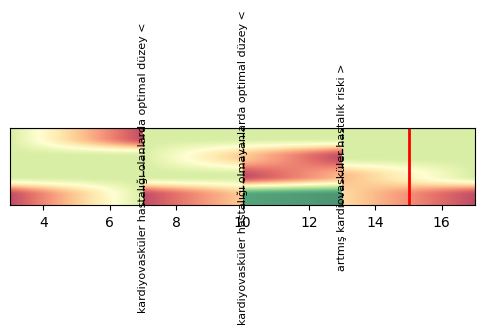

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def b_chart(patient, lwst, bgst, keylwst, keybgst, constant, remaining_limits):
    limits = [lwst, bgst] + list(remaining_limits.values())
    labels = [keylwst, keybgst] + list(remaining_limits.keys())

    x_min = min(limits) - constant
    x_max = max(limits) + constant

    x = np.linspace(x_min, x_max, 1000)
    y = np.ones(1000)

    range_values = np.zeros((len(limits) + 1, len(x)))

    for i in range(len(limits)):
        if i == 0:
            range_values[i] = np.where(x <= limits[i], (x - x_min) / (limits[i] - x_min), 0)
        elif i == len(limits) - 1:
            range_values[i] = np.where(x > limits[i], (x_max - x) / (x_max - limits[i]), 0)
        else:
            range_values[i] = np.where((x > limits[i - 1]) & (x <= limits[i]), (x - limits[i - 1]) / (limits[i] - limits[i - 1]), 0)
    range_values[-1] = 1 - range_values.sum(axis=0)

    plt.figure(figsize=(6, 1))
    plt.imshow(range_values, cmap='RdYlGn_r', aspect='auto', extent=[x_min, x_max, 0, 1], alpha=0.7)
    plt.plot(x, y, color='black')

    plt.gca().get_yaxis().set_visible(False)

    for limit, label in zip(limits, labels):
        plt.axvline(x=limit, color='black', linestyle='--', linewidth=1)
        plt.text(limit, 0.5, label, rotation=90, ha='center', va='center', fontsize=8)

    custom_value = max(x_min, min(patient, x_max))
    plt.axvline(x=custom_value, color='red', linestyle='-', linewidth=2)
    plt.show()

# Given function call
def trial():
    x = {"kardiyovasküler hastalığı olanlarda optimal düzey <": 7,
         "kardiyovasküler hastalığı olmayanlarda optimal düzey <": 10,
         "artmış kardiovasküler hastalık riski >": 13}

    lwst, bgst, keylwst, keybgst = float('inf'), 0, "", ""

    for key, value in x.items():
        if value < lwst:
            lwst, keylwst = value, key
        if value > bgst:
            bgst, keybgst = value, key

    remaining_limits = {k: v for k, v in x.items() if v not in [lwst, bgst]}
    constant = 2 * (abs(lwst - bgst)) / 3

    fig = b_chart(15, lwst, bgst, keylwst, keybgst, constant, remaining_limits)

trial()


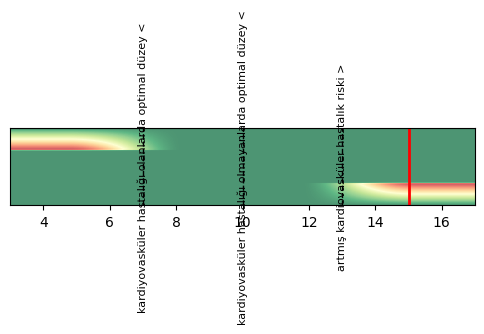

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def b_chart(patient, lwst, bgst, keylwst, keybgst, constant, remaining_limits):
    limits = [lwst, bgst] + list(remaining_limits.values())
    labels = [keylwst, keybgst] + list(remaining_limits.keys())

    x_min = min(limits) - constant
    x_max = max(limits) + constant

    x = np.linspace(x_min, x_max, 1000)
    y = np.ones(1000)

    range_values = np.zeros((len(limits) + 1, len(x)))

    # Finding minimum and maximum limits
    min_limit = min(limits)
    max_limit = max(limits)

    # Calculating the gradient between the minimum and maximum limits
    range_values[0] = np.where(x <= min_limit, (x - x_min) / (min_limit - x_min), 0)
    range_values[-1] = np.where(x > max_limit, (x_max - x) / (x_max - max_limit), 0)

    plt.figure(figsize=(6, 1))
    plt.imshow(range_values.T, cmap='RdYlGn_r', aspect='auto', extent=[x_min, x_max, 0, 1], alpha=0.7) # Transpose range_values
    plt.plot(x, y, color='black')

    plt.gca().get_yaxis().set_visible(False)

    for limit, label in zip(limits, labels):
        plt.axvline(x=limit, color='black', linestyle='--', linewidth=1)
        plt.text(limit, 0.5, label, rotation=90, ha='center', va='center', fontsize=8)

    custom_value = max(x_min, min(patient, x_max))
    plt.axvline(x=custom_value, color='red', linestyle='-', linewidth=2)
    plt.show()

# Given function call
def trial():
    x = {
        "kardiyovasküler hastalığı olanlarda optimal düzey <": 7,
        "kardiyovasküler hastalığı olmayanlarda optimal düzey <": 10,
        "artmış kardiovasküler hastalık riski >": 13
    }

    lwst, bgst, keylwst, keybgst = float('inf'), 0, "", ""

    for key, value in x.items():
        if value < lwst:
            lwst, keylwst = value, key
        if value > bgst:
            bgst, keybgst = value, key

    remaining_limits = {k: v for k, v in x.items() if v not in [lwst, bgst]}
    constant = 2 * (abs(lwst - bgst)) / 3

    fig = b_chart(15, lwst, bgst, keylwst, keybgst, constant, remaining_limits)

trial()
